Customer churn or Churn Prediction is the loss of clients or customers.
its also known as customer attrition, occurs when customers stop doing business with a company. The companies are interested in identifying segments of these customers because the price for acquiring a new customer is usually higher than retaining the old one

In [251]:
import numpy as np
import pandas as pd
#import hyperopt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt # For plotting graphs 
%matplotlib inline 
import os
from numpy import set_printoptions
import warnings
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from pandas.plotting import scatter_matrix

In [252]:
warnings.filterwarnings('ignore') # if there are any warning due to version mismatch, it will be ignored
np.set_printoptions(suppress=True,formatter={'float_kind':'{:f}'.format})

In [253]:
churn = pd.read_csv("Churn.csv", low_memory=False)

In [254]:
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [255]:
churn.isnull().sum() # checking for total na's for each column
churn2 = churn.copy() 

In [256]:
churn.columns # Viewing column of interest

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [257]:
churn.shape # we can see that we have a total of 1000 observations and 14 columns including the labels

(10000, 14)

In [258]:
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### Removing Unimportant columns

In [259]:
churn = churn.drop(['RowNumber', 'CustomerId','Surname'] , 1) 
# since they cant give us important information about the dependent  variable

In [260]:
churn.corr(method='pearson')

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


### The skew result show a positive (right) or negative (left) skew.
### Values closer to zero show less skew

In [261]:
churn.skew()

CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

 ## Histogram

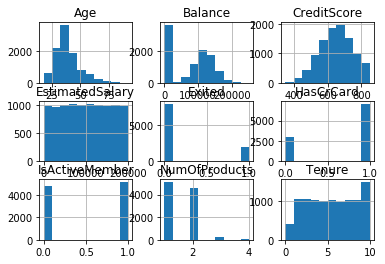

In [262]:
churn.hist()
plt.show()

We can see that the Age and creditscore attributes may have a Gaussian or nearly Gaussian distribution.
Which is interesting because most machine learning techniques assume a Gaussian univariate distribution on the input variables.

## Density Plot

Which is another way of getting a quick idea of the distriubtion of each of the numeric feature.

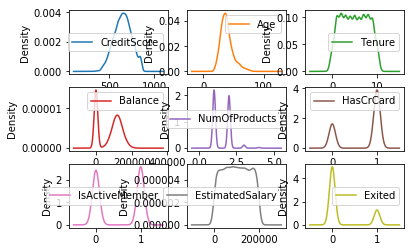

In [263]:
churn.plot(kind = 'density', subplots = True, 
           layout = (3,3), sharex = False)
plt.show()

From the plot above, we can see that the distribution for each of the numeric feature is clearer than the histograms above.

## Box and Whisker Plots

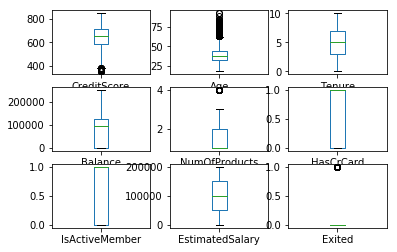

In [264]:
churn.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

The Boxplots summarize the distribution of each attribute, drawing a line for the median and a box which is around the 25th and 75th percentiles of
the churn data. The whiskers give an idea of the spread of the data and dots outside of the whiskers show the presence outlier that are 1.5 times greater than the size of spread of the data.

## plot correlation matrix

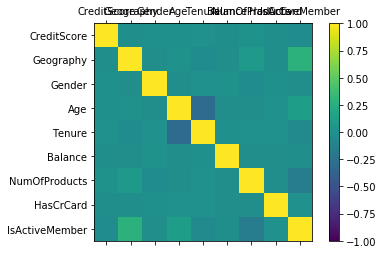

In [265]:
correlations = churn.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(churn.columns)
ax.set_yticklabels(churn.columns)
plt.show()

### Scatterplot Matrix

scatter_matrix(churn)
plt.show()

In [266]:
X = churn.drop('Exited',axis=1)
y = churn.Exited
cate_features_index = np.where(X.dtypes != float)[0]

In [267]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X[['CreditScore','Age','Tenure','Balance','NumOfProducts',
                                  'EstimatedSalary']])
# summarize transformed data
set_printoptions(precision=3)

### Standardize Data

In [268]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X[['CreditScore','Age','Tenure','Balance','NumOfProducts',
                                  'EstimatedSalary']])
rescaledX = scaler.transform(X[['CreditScore','Age','Tenure','Balance','NumOfProducts',
                                  'EstimatedSalary']])

In [269]:
labelencoder = LabelEncoder()

X['Gender'] = labelencoder.fit_transform(X['Gender'].astype('str'))
X['Geography'] = labelencoder.fit_transform(X['Geography'].astype('str'))

In [270]:
#one hot encoding
onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 1:]

#### Splitting the dataset into the Training set and Test set

In [271]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## Logistics

In [272]:
model = LogisticRegression()
model.fit(X_train, y_train)
result = model.score(X_test, y_test)
print("Accuracy:", (result*100.0))

Accuracy: 77.96666666666667


# Kfold validation

In [273]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
num_folds = 10
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed)
model = LogisticRegression()
results = cross_val_score(model, X_train, y_train, cv=kfold)
results.mean()*100.0, results.std()*100.0

(79.32857142857142, 1.502446983682122)

### LOOCV

In [274]:
from sklearn.model_selection import LeaveOneOut

In [275]:
num_folds = 10
loocv = LeaveOneOut()
model = LogisticRegression()
results = cross_val_score(model, X_train, y_train, cv=loocv)
results.mean()*100.0, results.std()*100.0

(79.14285714285715, 40.628732167654704)

In [276]:
# Bagged Decision Trees for Classification

In [277]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
seed = 7
kfold = KFold(n_splits=10, random_state=seed)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean())

0.8524285714285714
